In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numba

In [3]:
ic = np.random.randint(0, 2, (5, 5))
ic

array([[0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1]])

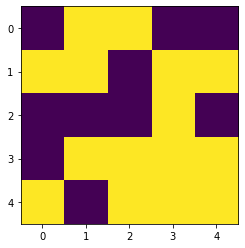

In [4]:
plt.imshow(ic)

In [46]:
#@numba.jit(nopython = True)
#@numba.njit
#numba.int64(numba.int64[:,:], numba.int64, numba.int64)
@numba.njit(numba.int64(numba.int64[:,:], numba.int64, numba.int64))
def next_cell_value(arr, r, c):
    height, width = arr.shape
    cell_sum = -arr[r, c]
    for dh in range(-1, 2):
        for dw in range(-1, 2):
            cell_sum += arr[(r + dh) % height, (c + dw) % width]

    if arr[r, c] == 1 and (cell_sum == 2 or cell_sum == 3):
        return 1
    if arr[r, c] == 0 and cell_sum == 3:
        return 1
    return 0       

In [48]:
@numba.njit(numba.int64[:,:](numba.int64[:,:], numba.int64[:,:]), parallel = True)
def next_step(in_array, out_array):
    height, width = in_array.shape
    for h in numba.prange(height):
        for w in numba.prange(width):
            out_array[h, w] = next_cell_value(in_array, h, w)
    return out_array

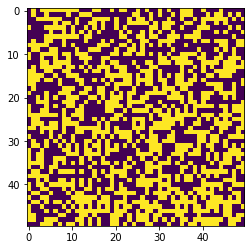

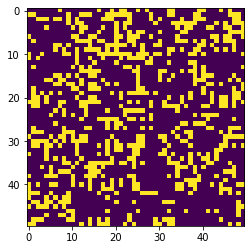

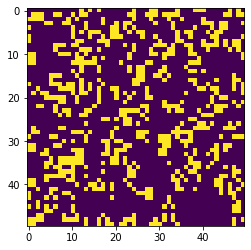

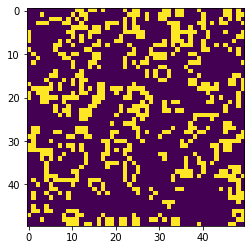

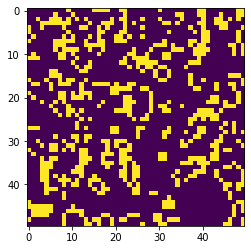

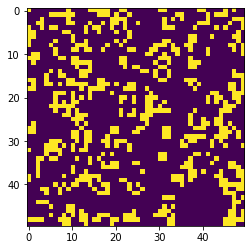

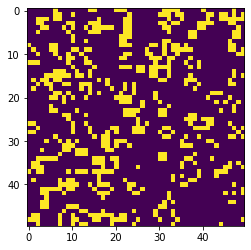

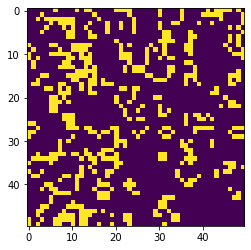

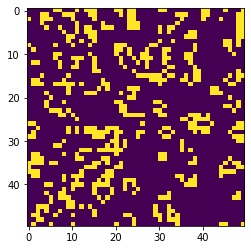

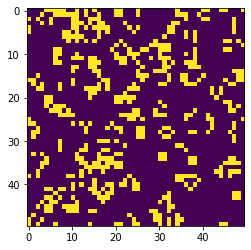

In [8]:
ic = np.random.randint(0, 2, (50, 50))
buffer = np.zeros_like(ic)

for _ in range(10):
    plt.imshow(ic)
    plt.show()
    next_step(ic, buffer)
    ic, buffer = buffer, ic
    

In [12]:
ic = np.random.randint(0, 2, (50, 50))
buffer = np.zeros_like(ic)

fig = plt.figure(figsize = (10, 10))
data = plt.imshow(ic)
plt.close()

def frame(i):
    global ic, buffer
    next_step(ic, buffer)
    ic, buffer = buffer, ic
    data.set_data(ic)
    return data,

animation = FuncAnimation(fig, frame, frames = 100, blit = True)
HTML(animation.to_jshtml())

In [49]:
@numba.njit(numba.int64[:,:](numba.int64), parallel = True)
def one_step(l):
    ic = np.random.randint(0, 2, (20000, 20000))
    buffer = np.zeros_like(ic)
    next_step(ic, buffer)
    ic, buffer = buffer, ic

    return ic

    

In [45]:
one_step(20000)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [52]:
one_step(20000)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)